First we will have to find the audio device and configure some settings on it

In [5]:
import sounddevice as sd

### Find UMA16 Device
def list_devices():
    lst = sd.query_devices()
    print(lst)

def find_input_device():
    lst = sd.query_devices("micArray16")
    # print(lst)
    return lst

# list_devices()
indev = sd.query_devices("micArray16")
print(f"Found input device {indev}")

# default settings
Fs       = 44000
nchan    = 16
sd.default.samplerate = Fs
sd.default.channels = nchan
sd.default.device = indev['index']


Found input device {'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0)', 'index': 0, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0}


In [4]:
list_devices()

* 0 nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0), ALSA (16 in, 0 out)
  1 pulse, ALSA (32 in, 32 out)
  2 default, ALSA (32 in, 32 out)


We can then record a couple of seconds of audio on all 16 microphones
The audio samples will then be cast to a numpy array for further (speedier) handling of the data

In [15]:
import numpy as np

npt = 128*1024 # / channel
dur = npt/Fs

print(">>> Start recording for %5.2fs (%d samples per ch)" % (dur, npt))
rec = sd.rec(npt)
sd.wait()
arec = np.array(rec)
print(">>> Done (%s samples)" % str(np.shape(arec)))

>>> Start recording for  2.98s (131072 samples per ch)
>>> Done ((131072, 16) samples)


By plotting the audio data we can confirm the microphones did indeed pickup (and the same) sound

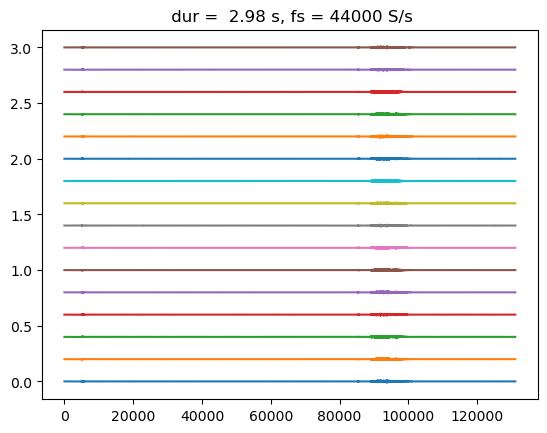

In [18]:
import matplotlib.pyplot as plt

plt.close("all")
off = 0.2
for irec in range(nchan):
    plt.plot(arec[:,irec]+irec*off, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s"%(dur, Fs))
plt.show()

We can now write a wavefile if we wish to process this audio with some audio editing software, like Audicity

In [20]:
import scipy.io.wavfile as wv

filename = 'test16.wav'
print("\n>>> Saving to file: %s" % (filename))
wv.write(filename, Fs, arec)


>>> Saving to file: test16.wav


However, the .wav format is not very suitable for usage in Acoular so we will also save a .h5 file which can be read by TimeSamples later on

In [21]:
import h5py

filename = 'test16c.h5'
with h5py.File(filename, 'w') as f:
    f.create_dataset(name='time_data', data=arec)
    obj = f['/time_data']
    obj.attrs['sample_freq'] = Fs

ModuleNotFoundError: No module named 'h5py'

You can see what datasets are in the h5 file with:

In [46]:
def list_h5_datasets(file_path):
    with h5py.File(file_path, 'r') as f:
        print("Datasets in '{}':".format(file_path))
        f.visititems(lambda name, obj: print(name, ": ", obj))
        
filename = 'audio16channels.h5'
list_h5_datasets(filename)    

OSError: Unable to synchronously open file (file signature not found)